In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
import time

In [2]:
# # initial vales
# L = 0.1 # wall thickness
# n = 10
# T0 = 0
# T1s = 40
# T2s = 20
# dx = L/n
# alpha = 0.0001
# t_final = 60
# dt = 0.1 # time step

In [3]:
# x = np.linspace(dx/2,L-dx/2, n)
# T = np.ones(n)*T0
# dTdt = np.empty(n)
# t = np.arange(0,t_final, dt)

In [4]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# for j in range(1,len(t)):
#     plt.ion()
#     for i in range(1,n-1):
#         dTdt[i] = alpha*(-(T[i]-T[i-1])/dx**2 + (T[i+1]-T[i])/dx**2)
#     dTdt[0] = alpha*(-(T[0]-T1s)/dx**2 + (T[1]-T[0])/dx**2)
#     dTdt[n-1] = alpha*(-(T[n-1]-T[n-2])/dx**2 + (T2s-T[n-1])/dx**2)
#     T = T + dTdt*dt
#     ax.plot(x,T)
#     ax.set(xlim=(0, L), ylim=(0, 50))
#     ax.set_xlabel('Distance (m)')
#     ax.set_ylabel('Temp.(C)')
#     fig.canvas.draw()
#     plt.pause(0.05)       
        

#### The two-dimensional diffusion equation model
$$ 
\begin{align}
\frac{\partial{U}}{\partial {t}} &= D\left(\frac{\partial^2{U}}{\partial {x^2}}+ \frac{\partial^2{U}}{\partial{y^2}}\right)\\ \\
\frac{u_{i,j}^{(n+1)}-u_{i,j}^{(n)}}{\Delta t} & = D \left[\frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}} {(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}} {(\Delta y)^2} \right]\\ \\
u_{i,j}^{(n+1)} & = u_{i,j}^{(n)} + D \Delta t \left[\frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}} {(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}} {(\Delta y)^2} \right] \\ \\
\Delta t & = \frac{1}{2D}\frac{(\Delta x \Delta y)^2}{(\Delta x)^2 + (\Delta y)^2}
\end{align}
$$


In [5]:
# for loop code, but has errors, so it is not correct
try:
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            uxx = (u0[i+1,j] - 2*u0[i,j] + u0[i-1,j])/dx2
            uyy = (u0[i,j+1] - 2*u0[i,j] + u0[i,j-1])/dy2
            u[i,j] = u0[i,j] + dt*D*(uxx + uyy)
except: 
    pass
        

0 1
10 2
50 3
100 4


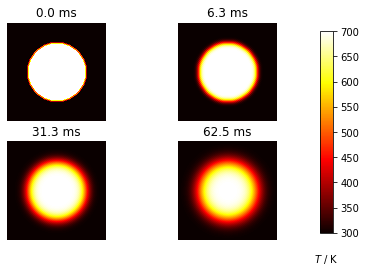

In [6]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4 

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 3, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

#### The two-dimensional diffusion equation model
$$ 
\begin{align}
\frac{\partial{U}}{\partial {t}} &= D\left(\frac{\partial^2{U}}{\partial {x^2}}\right)\\ \\
\frac{u_{i,j}^{(n+1)}-u_{i,j}^{(n)}}{\Delta t} & = D \left[\frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}} {(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}} {(\Delta y)^2} \right]\\ \\
u_{i,j}^{(n+1)} & = u_{i,j}^{(n)} + D \Delta t \left[\frac{u_{i+1,j}^{(n)} - 2u_{i,j}^{(n)} + u_{i-1,j}^{(n)}} {(\Delta x)^2} + \frac{u_{i,j+1}^{(n)} - 2u_{i,j}^{(n)} + u_{i,j-1}^{(n)}} {(\Delta y)^2} \right] \\ \\
\Delta t & = \frac{1}{2D}\frac{(\Delta x \Delta y)^2}{(\Delta x)^2 + (\Delta y)^2}
\end{align}
$$
